# TP1 : Régression linéaire simple 

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd

# 1. Dataset
Génération de données aléatoires avec une tendance linéaire avec make_regression: on a un dataset $(x, y)$ qui contient 100 exemples, et une seule variable $x$. Note: chaque fois que la cellule est executée, des données différentes sont générer. Utiliser np.random.seed(0) pour reproduire le meme Dataset a chaque fois.

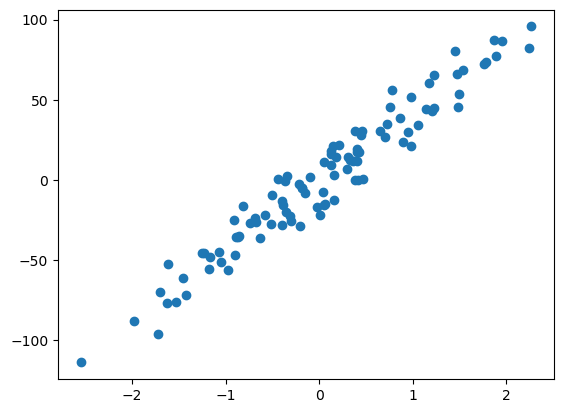

In [2]:
np.random.seed(0) # pour toujours reproduire le meme dataset
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y) # afficher les résultats. X en abscisse et y en ordonnée

Important: vérifier les dimensions de x et y. On remarque que y n'a pas les dimensions (100, 1). On corrige le probleme avec np.reshape

In [36]:
print(x.shape)
print(y.shape)

# redimensionner y
y = y.reshape(y.shape[0], 1)

print(y.shape)

(100, 1)
(25, 1)
(25, 1)


Création de la matrice X qui contient la colonne de Biais. Pour ca, on colle l'un contre l'autre le vecteur x et un vecteur 1 (avec np.ones) de dimension égale a celle de x

In [4]:
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

(100, 2)


In [5]:
X

array([[-0.35955316,  1.        ],
       [ 0.97663904,  1.        ],
       [ 0.40234164,  1.        ],
       [-0.81314628,  1.        ],
       [-0.88778575,  1.        ],
       [ 0.44386323,  1.        ],
       [-0.97727788,  1.        ],
       [ 0.42833187,  1.        ],
       [ 0.20827498,  1.        ],
       [-0.31155253,  1.        ],
       [-0.51080514,  1.        ],
       [ 0.12691209,  1.        ],
       [-1.53624369,  1.        ],
       [-0.40178094,  1.        ],
       [ 0.6536186 ,  1.        ],
       [ 1.17877957,  1.        ],
       [-0.17992484,  1.        ],
       [ 1.78587049,  1.        ],
       [ 1.45427351,  1.        ],
       [-0.68481009,  1.        ],
       [ 0.97873798,  1.        ],
       [ 1.89588918,  1.        ],
       [-0.4380743 ,  1.        ],
       [ 0.3130677 ,  1.        ],
       [ 0.76103773,  1.        ],
       [ 0.77749036,  1.        ],
       [ 1.9507754 ,  1.        ],
       [ 0.33367433,  1.        ],
       [-0.34791215,

Finalement, création d'un vecteur parametre $\theta$, initialisé avec des coefficients aléatoires. Ce vecteur est de dimension (2, 1). Si on désire toujours reproduire le meme vecteur $\theta$, on utilise comme avant np.random.seed(0).

In [6]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta = np.random.randn(2,1)
theta

array([[1.76405235],
       [0.40015721]])

# 2. Modele Linéaire
On implémente un modele $F = X.\theta$, puis on teste le modele pour voir s'il n'y a pas de bug (bonne pratique oblige). En plus, cela permet de voir a quoi ressemble le modele initial, défini par la valeur de $\theta$

In [7]:
#The dot() method multiplies each value from one DataFrame with the values from another DataFrame (or Series or array), and adds them together
def model(X, theta):
    return X.dot(theta)

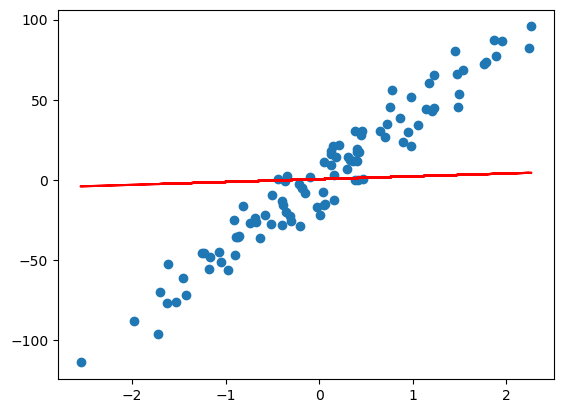

In [8]:
plt.scatter(x, y)
plt.plot(x, model(X,theta), c='r')

# 3. Fonction Cout :  Erreur Quadratique moyenne
On mesure les erreurs du modele sur le Dataset X, y en implémenterl'erreur quadratique moyenne,  **Mean Squared Error (MSE)** en anglais.

$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $

Ensuite, on teste notre fonction, pour voir s'il n'y a pas de bug

In [9]:
def cost_function(X, y, theta):
    m = X.shape[0]
    return 1/(2*m) * np.sum((model(X,theta) - y)**2)

In [10]:
cost_function(X, y, theta)

905.6306841935502

# 4. Gradients et Descente de Gradient
On implémente la formule du gradient pour la **MSE**

$\frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(X.\theta - y)$

Ensuite on utilise cette fonction dans la descente de gradient:

$\theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta}$


In [11]:
def grad(X, y, theta):
    m = X.shape[0]
    return 1/m * X.T.dot(model(X,theta ) - y)

In [12]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X,y,theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X,y,theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

# 5. Phase d'entrainement
On définit un **nombre d'itérations**, ainsi qu'un **pas d'apprentissage $\alpha$**, et c'est partit !

Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

In [13]:
n_iterations = 1000
learning_rate = 0.01


theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [14]:
theta_final # voici les parametres du modele une fois que la machine a été entrainée

array([[42.61765864],
       [-0.81309274]])

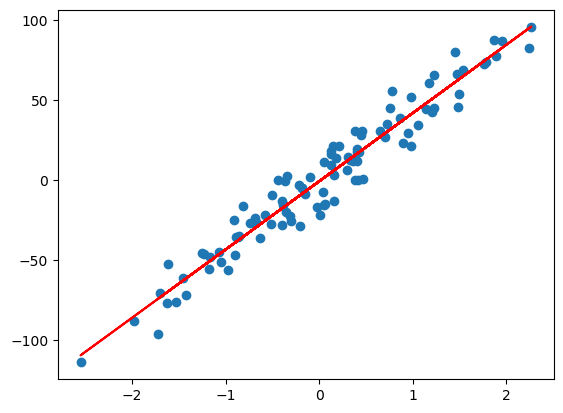

In [15]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X,theta_final )

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

# 6. Courbes d'apprentissage
Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout a travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'a stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas **learning_rate** est peut-etre trop élevé, il faut prendre un pas plus faible.

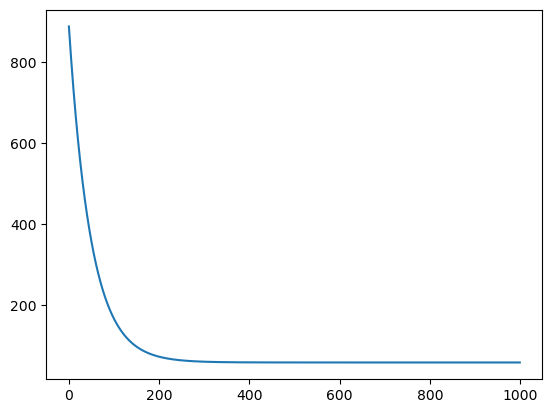

In [16]:
plt.plot(range(n_iterations), cost_history)

# 7. Evaluation finale
Pour évaluer la réelle performance de notre modele avec une métrique populaire (pour votre patron, client, ou vos collegues) on peut utiliser le **coefficient de détermination**, aussi connu sous le nom $R^2$. Il nous vient de la méthode des moindres carrés. Plus le résultat est proche de 1, meilleur est votre modele

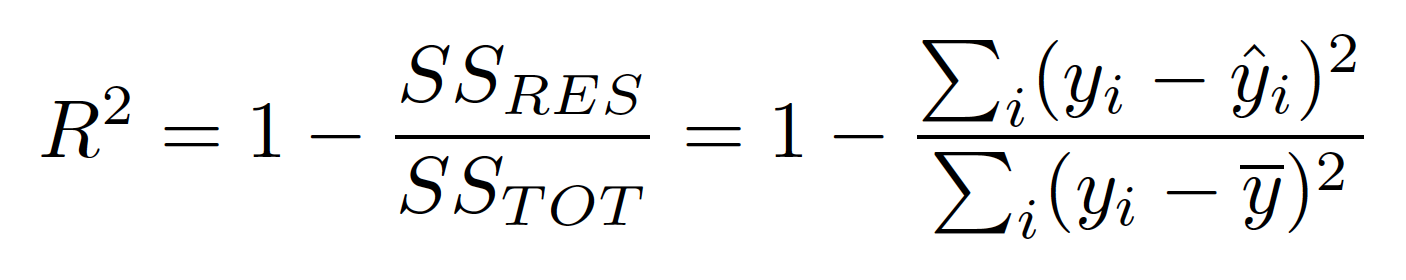

In [17]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2). sum()
    return 1 - u/v

In [18]:
coef_determination(y, predictions)

0.9417294706504984

# Linear Regression in Python with Scikit-Learn


dataset: https://drive.google.com/file/d/1oakZCv7g3mlmCSdv9J8kdSaqO5_6dIOw/view?usp=drive_open

In [19]:
# Remplacez le contenu de path_to_file par le chemin de votre fichier student_scores.csv 
path_to_file = 'C:/Users/tarik/Downloads/student_scores.csv'
df = pd.read_csv(path_to_file)

In [20]:
df.head() 
# Nous pouvons également vérifier la forme de notre dataset via la fonction shape
df.shape

(25, 2)

Scatterplots constituent un excellent moyen d'explorer les relations entre les variables. Nous allons représenter les heures sur l'axe des X et les scores sur l'axe des Y, et pour chaque paire, un marqueur sera positionné en fonction de leurs valeurs.

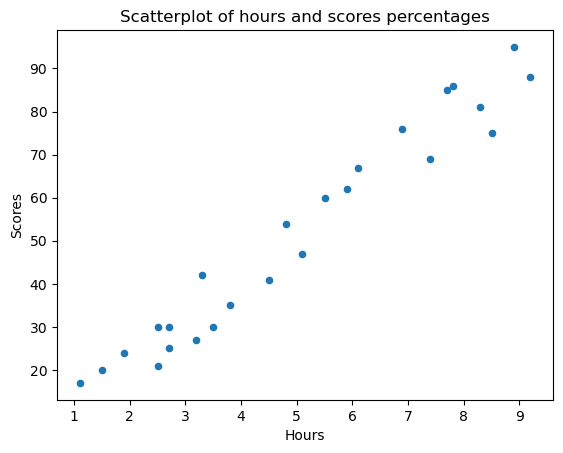

In [38]:
df.plot.scatter(x='Hours', y='Scores', title='Scatterplot of hours and scores percentages');


Plus les heures augmentent, plus les scores augmentent. Il y a une corrélation positive assez élevée ici ! Puisque la forme de la ligne que les points forment semble être droite, nous disons qu'il y a une corrélation linéaire positive entre les variables Heures et Notes. Quelle est leur corrélation ? La méthode corr() calcule et affiche les corrélations entre les variables numériques d'un DataFrame :


In [22]:
print(df. corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [23]:
y = df['Scores'].values.reshape(-1, 1)
X = df['Hours'].values.reshape(-1, 1)

Cette méthode prend des échantillons au hasard en respectant le pourcentage que nous avons défini, mais en respectant les paires X-y, de peur que l'échantillonnage ne mélange totalement la relation. Les répartitions formation-test les plus courantes sont 80/20 et 70/30.


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Training a Linear Regression Model


Nous avons nos ensembles de formation et de test prêts. Scikit-Learn dispose d'une pléthore de types de modèles que nous pouvons facilement importer et former, la régression linéaire étant l'un d'entre eux :

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()


Maintenant, nous devons ajuster la ligne à nos données, nous allons le faire en utilisant la méthode .fit() avec nos données X_train et y_train :


In [26]:
regressor.fit(X_train, y_train)


LinearRegression()

Si aucune erreur n'est générée, le régresseur a trouvé la ligne la mieux adaptée ! La ligne est définie par nos caractéristiques et l'intercept/pente. En fait, nous pouvons inspecter l'intercept et la pente en imprimant les attributs regressor.intecept_ et regressor.coef_, respectivement :

# Making Predictions


In [27]:
score = regressor.predict([[9.5]])
print(score) # 94.80663482

[[94.59672657]]


Pour faire des prédictions sur les données de test, nous passons les valeurs X_test à la méthode predict(). Nous pouvons affecter les résultats à la variable y_pred

In [30]:
y_pred = regressor.predict(X_test)


# Evaluating the Model


Mean Squared Error (MSE): Il élève au carré les valeurs absolues des erreurs. Plus elles sont petites, ou proches de 0, mieux c'est. La valeur MSE est élevée au carré de manière à rendre les erreurs importantes encore plus importantes. Une chose à laquelle il faut faire attention, c'est qu'il s'agit généralement d'une métrique difficile à interpréter en raison de la taille de ses valeurs et du fait qu'elles ne sont pas à la même échelle que les données.

In [32]:
from sklearn.metrics import  mean_squared_error

In [34]:
mse = mean_squared_error(y_test,y_pred)

In [35]:
mse

30.20151681102278